In [18]:
# ================================
# 1. Import Libraries
# ================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")



In [20]:
# ================================
# 2. Load Dataset
# ================================

# Change your file path
DATA_PATH = r"D:\AI_Project_2026\AI_2026\Day07 SVM\groupA\po\data.csv"

df = pd.read_csv(DATA_PATH)

print("Dataset Shape :", df.shape)

print("\nFirst 5 Rows")
print(df.head())

Dataset Shape : (569, 33)

First 5 Rows
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst 

In [ ]:
# ================================
# 3. Data Cleaning
# ================================

# Drop ID column
df = df.drop("id", axis=1)


# Sometimes breast cancer dataset has full NaN column
if "Unnamed: 32" in df.columns:
    df = df.drop("Unnamed: 32", axis=1)


# Diagnosis convert text → number
df["diagnosis"] = df["diagnosis"].map({
    "M":1,
    "B":0
})


#  VERY IMPORTANT FIX (REMOVE NaN)
df = df.dropna()

# OR (better option)
# df = df.fillna(df.mean(numeric_only=True))


print("\nDiagnosis Count")
print(df["diagnosis"].value_counts())


Diagnosis Count
diagnosis
0    357
1    212
Name: count, dtype: int64


In [22]:


# ================================
# 4. Split Features and Target
# ================================

X = df.drop("diagnosis", axis=1)

y = df["diagnosis"]


print("\nFeature Shape:", X.shape)


Feature Shape: (569, 30)


In [37]:

# ================================
# 5. Train Test Split
# ================================

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [24]:

# ================================
# 6. Feature Scaling (Very Important)
# ================================

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)



In [32]:

# ================================
# 7. Linear SVM Model တည်ဆောက်ခြင်း
# ================================

from sklearn.svm import SVC

# Linear Kernel SVM Model Create
svm_model = SVC(
    kernel="linear",   # Linear Hyperplane
    C=1.0,             # Regularization Parameter
    random_state=42
)

# Model Training
svm_model.fit(X_train, y_train)





,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'linear'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [27]:

# ================================
# 8. Prediction
# ================================

y_pred = svm_model.predict(X_test)

print("Prediction Result:")
print(y_pred)


Prediction Result:
[0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 1 1]


In [28]:


# ================================
# 9. Evaluation
# ================================

accuracy = accuracy_score(y_test, y_pred)

print("\nAccuracy =", accuracy)


print("\nClassification Report")
print(classification_report(y_test, y_pred))


print("\nConfusion Matrix")

cm = confusion_matrix(y_test, y_pred)

print(cm)





Accuracy = 0.956140350877193

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114


Confusion Matrix
[[68  3]
 [ 2 41]]


In [ ]:
# ================================
# Feature Importance Calculation
# ================================

import pandas as pd
import numpy as np

# Linear SVM Weight Values
# f(x)=w1​x1​+w2​x2​+...+wn​xn​+b
importance = svm_model.coef_[0]

# Feature Names
feature_names = X.columns

feature_importance = pd.DataFrame({
    "Feature": feature_names,
    "Importance": np.abs(importance)  # absolute value
})

# Sort Highest Importance
feature_importance = feature_importance.sort_values(
    by="Importance",
    ascending=False
)

print(feature_importance.head(10))

                 Feature  Importance
7    concave points_mean    1.416505
21         texture_worst    1.192843
10             radius_se    1.013810
28        symmetry_worst    0.802394
13               area_se    0.774404
5       compactness_mean    0.754107
26       concavity_worst    0.751279
6         concavity_mean    0.651631
19  fractal_dimension_se    0.603057
20          radius_worst    0.597820


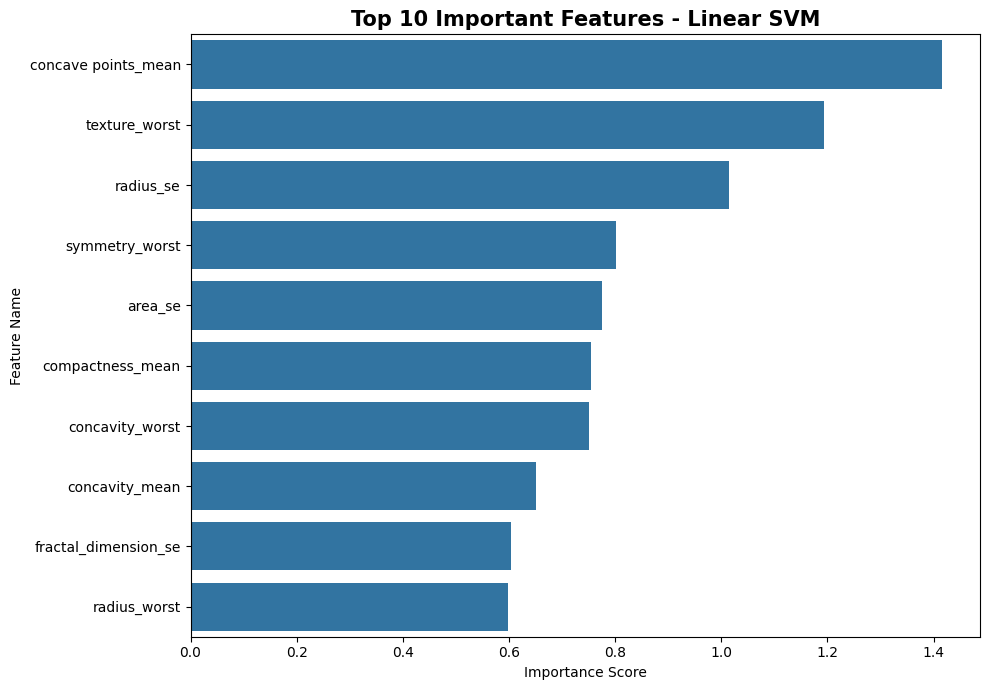

In [36]:
# ================================
# Seaborn Feature Importance Plot
# ================================

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))

sns.barplot(
    data=feature_importance.head(10),
    x="Importance",
    y="Feature"
)

plt.title("Top 10 Important Features - Linear SVM",
          fontsize=15,
          fontweight="bold")

plt.xlabel("Importance Score")

plt.ylabel("Feature Name")

plt.tight_layout()

plt.show()

In [47]:
# Example Patient Data (Replace values with actual patient data)
patient_data = {
    "radius_mean": 14.2,
    "texture_mean": 19.0,
    "perimeter_mean": 90.1,
    "area_mean": 600.5,
    "smoothness_mean": 0.1,
    "compactness_mean": 0.12,
    "concavity_mean": 0.08,
    "concave points_mean": 0.05,
    "symmetry_mean": 0.2,
    "fractal_dimension_mean": 0.06,
    # add all other features same as training dataset
    "radius_se": 0.3, "texture_se": 1.2, "perimeter_se": 2.1, "area_se": 15.0,
    "smoothness_se": 0.005, "compactness_se": 0.02, "concavity_se": 0.03, "concave points_se": 0.01,
    "symmetry_se": 0.02, "fractal_dimension_se": 0.003,
    "radius_worst": 16.0, "texture_worst": 25.0, "perimeter_worst": 110.0, "area_worst": 800.0,
    "smoothness_worst": 0.12, "compactness_worst": 0.15, "concavity_worst": 0.10, "concave points_worst": 0.08,
    "symmetry_worst": 0.25, "fractal_dimension_worst": 0.07
}

# Convert to DataFrame
patient_df = pd.DataFrame([patient_data])

# Print patient data
print("=== Patient Feature Values ===")
print(patient_df)

# Scale patient data
patient_scaled = scaler.transform(patient_df)

# Predict
patient_pred = svm_model.predict(patient_scaled)

# Print prediction result
if patient_pred[0] == 0:
    print("\nPrediction Result: Patient is Benign → ရောဂါမရှိ")
else:
    print("\nPrediction Result: Patient is Malignant → ရောဂါရှိ")

=== Patient Feature Values ===
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0         14.2          19.0            90.1      600.5              0.1   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0              0.12            0.08                 0.05            0.2   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                    0.06  ...          16.0           25.0            110.0   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0       800.0              0.12               0.15              0.1   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.08            0.25                     0.07  

[1 rows x 30 columns]

Prediction Result: Patient is Benign → ရောဂါမရှိ


In [48]:
# Example Patient Data that will be predicted as Malignant
patient_data = {
    "radius_mean": 20.0,              # ကြီးတဲ့ radius → usually malignant
    "texture_mean": 30.0,
    "perimeter_mean": 130.0,
    "area_mean": 1000.0,
    "smoothness_mean": 0.15,
    "compactness_mean": 0.2,
    "concavity_mean": 0.2,
    "concave points_mean": 0.15,
    "symmetry_mean": 0.3,
    "fractal_dimension_mean": 0.08,
    # Add all other features same as training dataset
    "radius_se": 1.0, "texture_se": 2.0, "perimeter_se": 3.0, "area_se": 40.0,
    "smoothness_se": 0.02, "compactness_se": 0.05, "concavity_se": 0.05, "concave points_se": 0.03,
    "symmetry_se": 0.03, "fractal_dimension_se": 0.004,
    "radius_worst": 25.0, "texture_worst": 40.0, "perimeter_worst": 180.0, "area_worst": 1500.0,
    "smoothness_worst": 0.18, "compactness_worst": 0.25, "concavity_worst": 0.25, "concave points_worst": 0.2,
    "symmetry_worst": 0.35, "fractal_dimension_worst": 0.1
}

# Convert to DataFrame
patient_df = pd.DataFrame([patient_data])

# Print patient data
print("=== Patient Feature Values ===")
print(patient_df)

# Scale patient data
patient_scaled = scaler.transform(patient_df)

# Predict
patient_pred = svm_model.predict(patient_scaled)

# Print prediction result
if patient_pred[0] == 0:
    print("\nPrediction Result: Patient is Benign → ရောဂါမရှိ")
else:
    print("\nPrediction Result: Patient is Malignant → ရောဂါရှိ")

=== Patient Feature Values ===
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0         20.0          30.0           130.0     1000.0             0.15   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0               0.2             0.2                 0.15            0.3   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                    0.08  ...          25.0           40.0            180.0   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      1500.0              0.18               0.25             0.25   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                   0.2            0.35                      0.1  

[1 rows x 30 columns]

Prediction Result: Patient is Malignant → ရောဂါရှိ


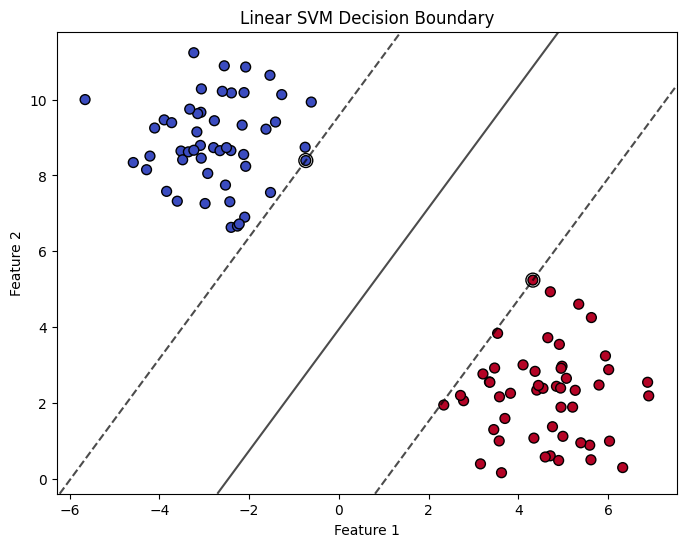

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Create a simple 2D dataset
X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.2)

# Train a linear SVM
svm = SVC(kernel='linear')
svm.fit(X, y)

# Plot the points
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k')

# Plot the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.7,
           linestyles=['--','-','--'])

# Highlight support vectors
ax.scatter(svm.support_vectors_[:,0], svm.support_vectors_[:,1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')



plt.title("Linear SVM Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()